In this notebook we will find the vibrational modes of a simple model of a building. We will assume that the mass of the floors are much more than the mass of the walls and that the lateral stiffness of the walls can be modeled by a simple linear spring. We will investigate how the building may vibrate under initial conditions that could be caused by a gust of wind.

In [76]:
m = 4000  # kg
k = 5000  # N / m

In [77]:
import numpy as np

In [78]:
import matplotlib.pyplot as plt
%matplotlib notebook

In [79]:
np.set_printoptions(precision=5, linewidth=100, suppress=True)

In [80]:
M = m * np.eye(4)
M

array([[ 4000.,     0.,     0.,     0.],
       [    0.,  4000.,     0.,     0.],
       [    0.,     0.,  4000.,     0.],
       [    0.,     0.,     0.,  4000.]])

In [81]:
K = np.array([[10000, -5000, 0, 0],
              [-5000, 10000, -5000, 0],
              [0, -5000, 10000, -5000],
              [0, 0, -5000, 5000]])
K

array([[10000, -5000,     0,     0],
       [-5000, 10000, -5000,     0],
       [    0, -5000, 10000, -5000],
       [    0,     0, -5000,  5000]])

The system can be transformed into a symmetric eigenvalue problem by introducing the new coordinate:

$\mathbf{q}=\mathbf{L}\mathbf{x}$

$\mathbf{L}$ is the Cholesky decomposition of the mass matrix.

In [82]:
L = np.linalg.cholesky(M)
L

array([[ 63.24555,   0.     ,   0.     ,   0.     ],
       [  0.     ,  63.24555,   0.     ,   0.     ],
       [  0.     ,   0.     ,  63.24555,   0.     ],
       [  0.     ,   0.     ,   0.     ,  63.24555]])

Note that if $\mathbf{M}$ is diagonal the Cholesky decomposition is simply computed by taking the square root of the diagonal terms, i.e. $\mathbf{M}^{1/2} = L$.

In [83]:
M_half = np.sqrt(M)
M_half

array([[ 63.24555,   0.     ,   0.     ,   0.     ],
       [  0.     ,  63.24555,   0.     ,   0.     ],
       [  0.     ,   0.     ,  63.24555,   0.     ],
       [  0.     ,   0.     ,   0.     ,  63.24555]])

We will need the inverse of $\mathbf{L}$ to compute $\tilde{\mathbf{K}}$. NumPy provides a function that computes the inverse, `np.linalg.inv`.

In [84]:
L_inv = np.linalg.inv(L)
L_inv

array([[ 0.01581,  0.     ,  0.     ,  0.     ],
       [ 0.     ,  0.01581,  0.     ,  0.     ],
       [ 0.     ,  0.     ,  0.01581,  0.     ],
       [ 0.     ,  0.     ,  0.     ,  0.01581]])

Not that if $\mathbf{M}$ is diagonal you can compute the inverse of the squareroot of the diagonals, i.e. $\mathbf{M}^{-1/2}=\mathbf{L}^{-1}$.

In [85]:
M_neg_half = np.diag(M.diagonal()**-0.5)
M_neg_half

array([[ 0.01581,  0.     ,  0.     ,  0.     ],
       [ 0.     ,  0.01581,  0.     ,  0.     ],
       [ 0.     ,  0.     ,  0.01581,  0.     ],
       [ 0.     ,  0.     ,  0.     ,  0.01581]])

Now the transformed equation of motion:

$$\mathbf{q} + \tilde{\mathbf{K}} \mathbf{q} = 0$$

can be formed by calculating $\tilde{\mathbf{K}}=\mathbf{L}^{-1} \mathbf{K} \mathbf{L}^{-1}$.

In [86]:
K_tilde = L_inv @ K @ L_inv
K_tilde

array([[ 2.5 , -1.25,  0.  ,  0.  ],
       [-1.25,  2.5 , -1.25,  0.  ],
       [ 0.  , -1.25,  2.5 , -1.25],
       [ 0.  ,  0.  , -1.25,  1.25]])

Notice that $\tilde{\mathbf{K}}$ is symmetric, so we are guaranteed to get real eigenvalues and orthogonal eigenvectors when solving this system.

In [87]:
lambdas, P = np.linalg.eig(K_tilde)

In [88]:
lambdas

array([ 4.41511,  2.93412,  1.25   ,  0.15077])

The second array returned by `np.linalg.eig` contains the orthonormal eigenvectors. Each column is one eigenvector. Note that this is the $\mathbf{P}$ matrix where:

$$
\mathbf{P} = \left[ \mathbf{v}_1, \ldots, \mathbf{v}_4 \right]
$$

In [89]:
P

array([[ 0.42853,  0.65654, -0.57735,  0.22801],
       [-0.65654, -0.22801, -0.57735,  0.42853],
       [ 0.57735, -0.57735, -0.     ,  0.57735],
       [-0.22801,  0.42853,  0.57735,  0.65654]])

In [90]:
v1 = P[:, 0]
v1

array([ 0.42853, -0.65654,  0.57735, -0.22801])

# Exercise

Prove that the eigenvectors are orthonormal.

`np.linalg.eig` returns orthonormal eigenvectors. You can check the magnitude by ensuring that the square root of the dot product of a vector with itself is 1.

In [91]:
for evec in P.T:
    print(np.sqrt(np.dot(evec, evec)))

1.0
1.0
1.0
1.0


In [92]:
for evec in P.T:
    print(evec.T @ evec)

1.0
1.0
1.0
1.0


In [93]:
P.T @ P

array([[ 1., -0.,  0.,  0.],
       [-0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.]])

The frequencies of each mode are the square root of the eigenvalues.

In [94]:
ws = np.sqrt(lambdas)
ws

array([ 2.10122,  1.71293,  1.11803,  0.38829])

The eigenvectors can be transformed into the generalized coordinates by premultiplying by $\mathbf{L}^{-1}$.

In [95]:
S = L_inv @ P
S

array([[ 0.00678,  0.01038, -0.00913,  0.00361],
       [-0.01038, -0.00361, -0.00913,  0.00678],
       [ 0.00913, -0.00913, -0.     ,  0.00913],
       [-0.00361,  0.00678,  0.00913,  0.01038]])

In [109]:
from matplotlib.text import Text
ax.set_xticklabels?

<IPython.core.display.Javascript object>


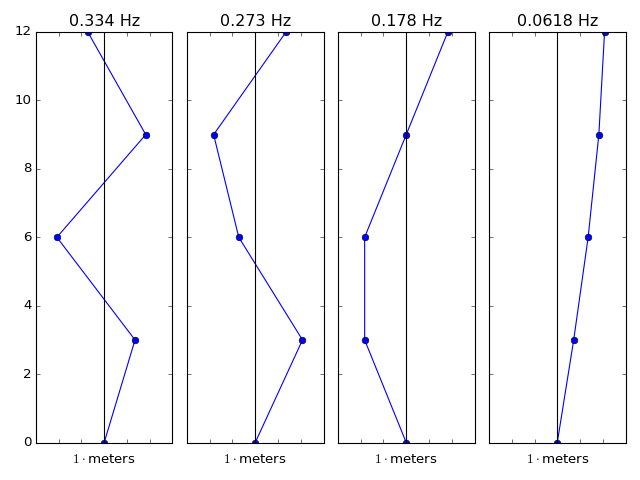

In [133]:
scale_factor = 1
fig, axes = plt.subplots(1, 4, sharey=True, sharex=True)
for i, ax in enumerate(axes):
    ax.plot(np.hstack((0, S[:, i])) * scale_factor, [0, 3, 6, 9, 12], marker='o')
    ax.axvline(0.0, color='black')
    ax.set_title('{:1.3} Hz'.format(ws[i] / 2 / np.pi))
    ax.set_xlabel('${} \cdot$meters'.format(scale_factor))
    ax.set_xticklabels(ax.get_xticklabels())
plt.ylim((0, 12))

    #ax.set_title('$d_{} = {:1.3f}$'.format(i, ds[i]))
plt.tight_layout()

In [134]:
x0 = np.array([0.001, 0.010, 0.020, 0.025])
xd0 = np.zeros(4)

In [135]:
q0 = L @ x0
qd0 = L @ xd0

In [136]:
phis = np.arctan2(ws * P.T @ q0, P.T @ xd0)
phis

array([ 1.5708, -1.5708, -1.5708,  1.5708])

In [137]:
ds = P.T @ q0 / np.sin(phis)
ds

array([-0.01835,  0.15542, -0.51121,  2.05382])

In [138]:
t = np.linspace(0, 100, num=1000)

In [139]:
x = np.zeros((4, 1000))
for di, wi, phii, ui in zip(ds, ws, phis, S.T):
    x += di * np.sin(wi * t + phii) * np.tile(ui, (len(t), 1)).T

# Exercise

Create a function called `simulate()` that returns the trajectories of the coordinates given an array of monotonically increasing time values and the initial conditions of the system. 

In [140]:
def simulate(t, x0, xd0):
    
    q0 = L @ x0
    qd0 = L @ xd0
    phis = np.arctan2(ws * P.T @ q0, P.T @ xd0)
    ds = P.T @ q0 / np.sin(phis)
    
    x = np.zeros((len(x0), len(t)))
    for di, wi, phii, ui in zip(ds, ws, phis, S.T):
        x += di * np.sin(wi * t + phii) * np.tile(ui, (len(t), 1)).T
    return x

<IPython.core.display.Javascript object>


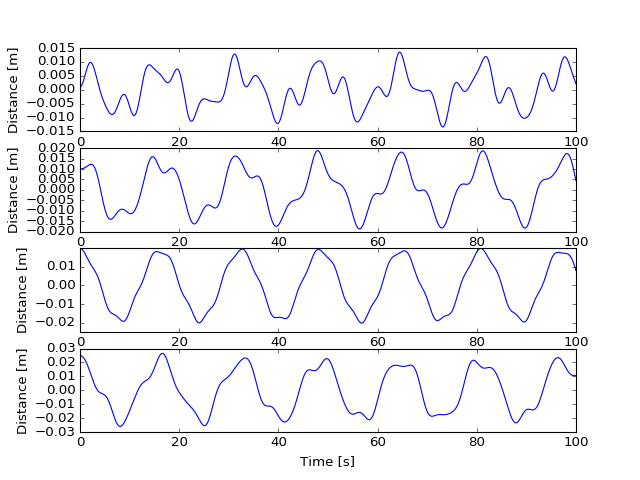

In [141]:
def plot_trajectories(t, x):
    fig, axes = plt.subplots(4, 1)
    for i, ax in enumerate(axes.flatten()):
        ax.plot(t, x[i])
        ax.set_ylabel('Distance [m]')
    ax.set_xlabel('Time [s]')
    
plot_trajectories(t, x)

In [198]:
t = np.linspace(0, 50, num=50 * 60)
initial = S[:, -1] * 50
x = simulate(t, initial, np.zeros(4))

<IPython.core.display.Javascript object>


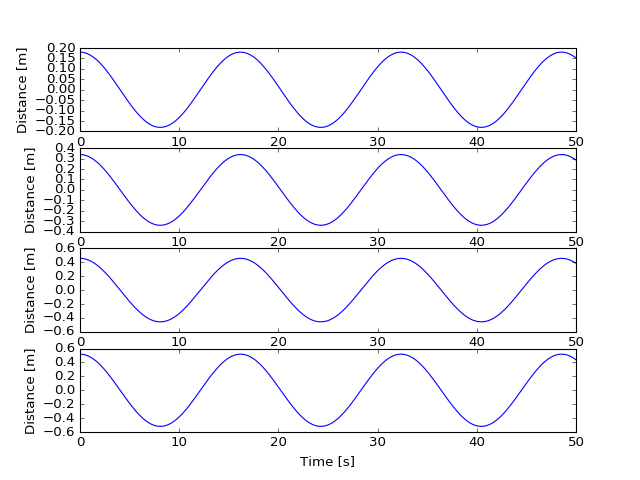

In [199]:
plot_trajectories(t, x)

In [200]:
from matplotlib.patches import Rectangle
import matplotlib.animation as animation

def plot_animation(t, x):
    fig, ax = plt.subplots(1, 1)

    width = 3  # meters
    height = 0.5  # meters

    ax.set_ylim((0, 14))
    ax.set_xlim((-5, 5))

    rects = []
    for i in range(4):
        rects.append(Rectangle((-width / 2, 3 - height + i * 3), width, height, fill=False))
   
    for rect in rects:
        ax.add_patch(rect)
        
    line = ax.plot(np.zeros(5), [0, 3, 6, 9, 12])[0]
    
    ax.set_aspect('equal')

    def animate(i):
    
        xi = x[:, i]
    
        for i, rect in enumerate(rects):
            rect.set_xy([-width / 2 + xi[i], 3 - height + i * 3])
            line.set_xdata(np.hstack((0, xi[i])))
                   
    ani = animation.FuncAnimation(fig, animate, frames=len(t), interval=1)
    
    return ani

<IPython.core.display.Javascript object>


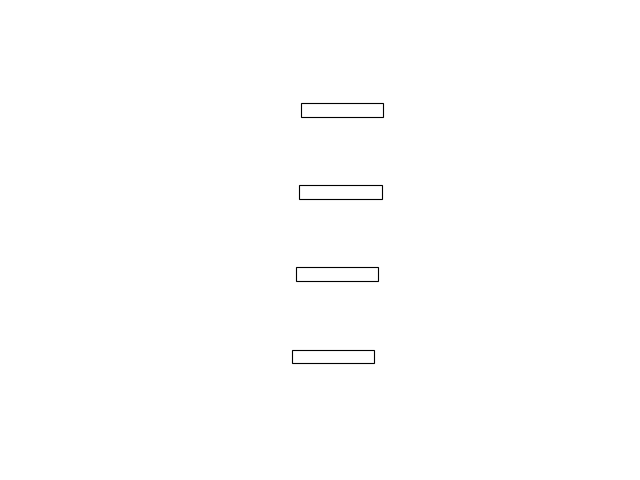

In [201]:
plot_animation(t, x)